In [ ]:
import numpy as np

import sympy as sp
from sympy.interactive import printing
from matplotlib import pyplot as plt
import asirt


In [ ]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [4]:
printing.init_printing(use_latex=True)

In [5]:
drx, dry, drz, dx, dy, dz = sp.symbols('drx, dry, drz, dx, dy, dz')
delta = asirt.delta_expand(drx, dry, drz, dx, dy, dz)
delta_collapsed = asirt.delta_collapse(delta)
delta, delta_collapsed

(array([[0, -drz, dry, dx],
        [drz, 0, -drx, dy],
        [-dry, drx, 0, dz],
        [0, 0, 0, 0]], dtype=object), [drx, dry, drz, dx, dy, dz])

In [6]:
# Задача 3.1 од Збирка решени задачи по вовед во роботика
t = np.array([[0, 0, 1, 2],
              [1, 0, 0, 7],
              [0, 1, 0, 5],
              [0, 0, 0, 1]])

delta = asirt.delta_expand(0, 0, 0.15, 0.1, 0.1, 0.3)
dt = delta @ t
t_new = t + dt
t_new

array([[-0.15,  0.  ,  1.  ,  1.05],
       [ 1.  ,  0.  ,  0.15,  7.4 ],
       [ 0.  ,  1.  ,  0.  ,  5.3 ],
       [ 0.  ,  0.  ,  0.  ,  1.  ]])

In [20]:
# Задача 3.13 од Збирка решени задачи по вовед во роботика
# use sympy sp.pi here instead of np.pi
a_2, a_3 = sp.symbols('a_2, a_3')
substitutions = {a_2: 2, a_3: 3}  # for robot.plot()
robot = asirt.SerialLink(subs=substitutions)
robot.add_prismatic_joint(0, 2, 0, sp.pi/2)
robot.add_revolute_joint(0, 0, a_2, -sp.pi/2)
robot.add_revolute_joint(0, 0, a_3, 0)
robot.plot()
t = robot.forward_kinematics()
j = robot.jacobian()
t, j

⎛                                                                             
⎜                                                                             
⎜⎡cos(θ₂)⋅cos(θ₃)  -sin(θ₃)⋅cos(θ₂)  -sin(θ₂)       (a₂ + a₃⋅cos(θ₃))⋅cos(θ₂) 
⎜⎢                                                                            
⎜⎢    sin(θ₃)          cos(θ₃)          0                   a₃⋅sin(θ₃)        
⎜⎢                                                                            
⎜⎢sin(θ₂)⋅cos(θ₃)  -sin(θ₂)⋅sin(θ₃)  cos(θ₂)   a₂⋅sin(θ₂) + a₃⋅sin(θ₂)⋅cos(θ₃)
⎜⎢                                                                            
⎜⎣       0                0             0                       1             
⎜                                                                             
⎝                                                                             

        ⎡0  -(a₂ + a₃⋅cos(θ₃))⋅sin(θ₂)  -a₃⋅sin(θ₃)⋅cos(θ₂)⎤⎞
        ⎢                                                  ⎥⎟
     ⎤

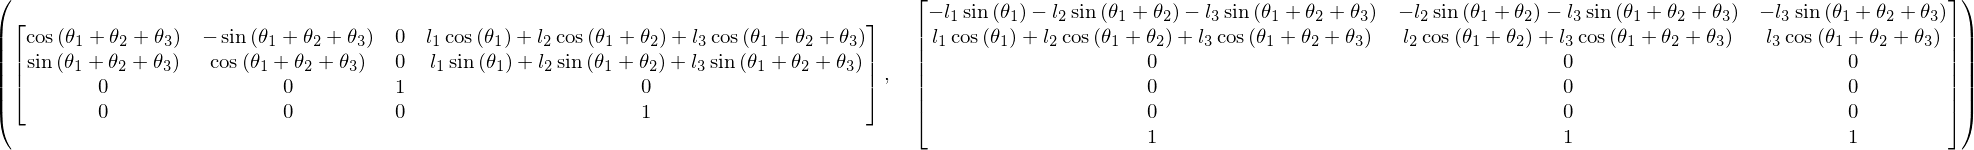

In [7]:
# Задача 3.14 од Збирка решени задачи по вовед во роботика
# use sympy sp.pi here instead of np.pi
l_1, l_2, l_3 = sp.symbols('l_1, l_2, l_3')
substitutions = {l_1: 3, l_2: 2, l_3: 2}  # for robot.plot()
robot = asirt.SerialLink(subs=substitutions)
robot.add_revolute_joint(0, 0, l_1, 0)
robot.add_revolute_joint(0, 0, l_2, 0)
robot.add_revolute_joint(0, 0, l_3, 0)
robot.plot()
t = robot.forward_kinematics()
j = robot.jacobian()
t, j

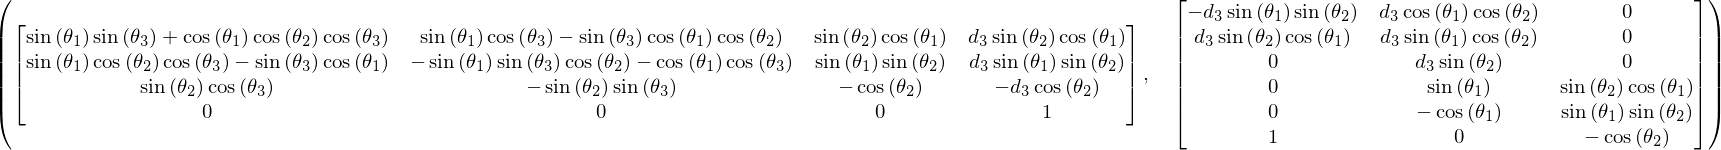

In [8]:
# Задача 3.15 од Збирка решени задачи по вовед во роботика
# use sympy sp.pi here instead of np.pi
d_3 = sp.symbols('d_3')
substitutions = {d_3: 2}  # for robot.plot()
robot = asirt.SerialLink(subs=substitutions)
robot.add_revolute_joint(0, 0, 0, sp.pi / 2)
robot.add_revolute_joint(sp.pi/2, 0, 0, sp.pi / 2)
robot.add_revolute_joint(0, d_3, 0, 0)
robot.plot()
t = robot.forward_kinematics()
j = robot.jacobian()
t, j

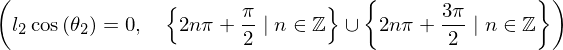

In [9]:
# Задача 3.16 од Збирка решени задачи по вовед во роботика
l_2, l_3, theta_2, theta_3, d1 = sp.symbols('l_2, l_3, theta_2, theta_3, d1')
x = -l_2 * sp.sin(theta_2) - l_3 * sp.sin(theta_2 + theta_3)
z = d1 + l_2 * sp.cos(theta_2) + l_3 * sp.cos(theta_2 + theta_3)
alpha = theta_2 + theta_3

j = asirt.jacobian([x, z, alpha], [d1, theta_2, theta_3])
det_j = sp.simplify(j.det())
equation = sp.Eq(det_j, 0)

solution = sp.solveset(det_j, theta_2)
equation, solution

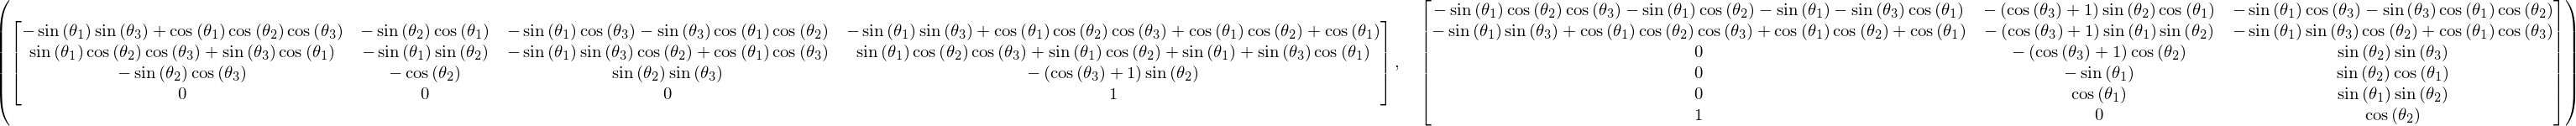

In [10]:
# Задача 3.17 од Збирка решени задачи по вовед во роботика
# use sympy sp.pi here instead of np.pi
robot = asirt.SerialLink()
robot.add_revolute_joint(0, 0, 1, -sp.pi / 2)
robot.add_revolute_joint(0, 0, 1, sp.pi / 2)
robot.add_revolute_joint(0, 0, 1, -sp.pi / 2)
robot.plot()
t = robot.forward_kinematics()
j = robot.jacobian()
t, j

In [21]:
# Задача 3.17 од Збирка решени задачи по вовед во роботика
# а)
# use sympy sp.pi here instead of np.pi
robot = asirt.SerialLink()
robot.add_revolute_joint(0, 0, 1, -sp.pi / 2)
robot.add_revolute_joint(0, 0, 1, sp.pi / 2)
robot.add_revolute_joint(0, 0, 1, -sp.pi / 2)
robot.plot()
t = robot.forward_kinematics()
jv = robot.linear_jacobian()
t, jv

⎛⎡-sin(θ₁)⋅sin(θ₃) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₃)  -sin(θ₂)⋅cos(θ₁)  -sin(θ₁)⋅cos(θ
⎜⎢                                                                            
⎜⎢sin(θ₁)⋅cos(θ₂)⋅cos(θ₃) + sin(θ₃)⋅cos(θ₁)   -sin(θ₁)⋅sin(θ₂)  -sin(θ₁)⋅sin(θ
⎜⎢                                                                            
⎜⎢             -sin(θ₂)⋅cos(θ₃)                   -cos(θ₂)                   s
⎜⎢                                                                            
⎝⎣                    0                              0                        

₃) - sin(θ₃)⋅cos(θ₁)⋅cos(θ₂)  -sin(θ₁)⋅sin(θ₃) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₃) + cos
                                                                              
₃)⋅cos(θ₂) + cos(θ₁)⋅cos(θ₃)  sin(θ₁)⋅cos(θ₂)⋅cos(θ₃) + sin(θ₁)⋅cos(θ₂) + sin(
                                                                              
in(θ₂)⋅sin(θ₃)                                        -(cos(θ₃) + 1)⋅sin(θ₂)  
                                                   

In [23]:
# Задача 3.17 од Збирка решени задачи по вовед во роботика
# б)
theta_1, theta_2, theta_3 = sp.symbols('theta_1, theta_2, theta_3')
j_2 = asirt.sym_rotz(theta_1).T @ jv
j_2


⎡                                                                             
⎢(-sin(θ₁)⋅sin(θ₃) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₃) + cos(θ₁)⋅cos(θ₂) + cos(θ₁))⋅sin(
⎢                                                                             
⎢(-sin(θ₁)⋅sin(θ₃) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₃) + cos(θ₁)⋅cos(θ₂) + cos(θ₁))⋅cos(
⎢                                                                             
⎣                                                                             

                                                                              
θ₁) + (-sin(θ₁)⋅cos(θ₂)⋅cos(θ₃) - sin(θ₁)⋅cos(θ₂) - sin(θ₁) - sin(θ₃)⋅cos(θ₁))
                                                                              
θ₁) - (-sin(θ₁)⋅cos(θ₂)⋅cos(θ₃) - sin(θ₁)⋅cos(θ₂) - sin(θ₁) - sin(θ₃)⋅cos(θ₁))
                                                                              
    0                                                                         

                             2                    

In [30]:
# Задача 3.17 од Збирка решени задачи по вовед во роботика
# в)
det_j = sp.simplify(j_2.det())
equation = sp.Eq(det_j, 0).simplify()
solution_theta_2 = sp.solveset(det_j, theta_2)
solution_theta_3 = sp.solveset(det_j, theta_3)
equation, solution_theta_2, solution_theta_3

((cos(θ₂) + 1)⋅(cos(θ₃) + 1)⋅sin(θ₃) = 0, {2⋅n⋅π + π | n ∊ ℤ}, {2⋅n⋅π | n ∊ ℤ}
 ∪ {2⋅n⋅π + π | n ∊ ℤ})

In [34]:
# Задача 3.18 од Збирка решени задачи по вовед во роботика
# а)
# use sympy sp.pi here instead of np.pi
l_1, l_2 = sp.symbols('l_1, l_2')
substitutions = {l_1: 2, l_2: 2}  # for robot.plot()
robot = asirt.SerialLink(subs=substitutions)
robot.add_prismatic_joint(0, 2, l_1, sp.pi / 2)
robot.add_revolute_joint(0, 0, l_2, 0)
robot.plot()
t = robot.forward_kinematics()
jv = robot.linear_jacobian()
jw = robot.rotational_jacobian()
j = sp.Matrix.vstack(jv[0, :], jv[2, :])
t, jv, j, jw

⎛⎡cos(θ₂)  -sin(θ₂)  0   l₁ + l₂⋅cos(θ₂)⎤                                     
⎜⎢                                      ⎥  ⎡0  -l₂⋅sin(θ₂)⎤                   
⎜⎢   0        0      -1         0       ⎥  ⎢              ⎥  ⎡0  -l₂⋅sin(θ₂)⎤ 
⎜⎢                                      ⎥, ⎢0       0     ⎥, ⎢              ⎥,
⎜⎢sin(θ₂)  cos(θ₂)   0   d₁ + l₂⋅sin(θ₂)⎥  ⎢              ⎥  ⎣1  l₂⋅cos(θ₂) ⎦ 
⎜⎢                                      ⎥  ⎣1  l₂⋅cos(θ₂) ⎦                   
⎝⎣   0        0      0          1       ⎦                                     

        ⎞
 ⎡0  0 ⎤⎟
 ⎢     ⎥⎟
 ⎢0  -1⎥⎟
 ⎢     ⎥⎟
 ⎣0  0 ⎦⎟
        ⎠

In [36]:
# Задача 3.18 од Збирка решени задачи по вовед во роботика
# б) в)
theta_2 = sp.symbols('theta_2')
det_j = sp.simplify(j.det())
equation = sp.Eq(det_j, 0).simplify().simplify()
solution = sp.solveset(det_j, theta_2)
equation, solution

(l₂⋅sin(θ₂) = 0, {2⋅n⋅π | n ∊ ℤ} ∪ {2⋅n⋅π + π | n ∊ ℤ})

In [16]:
# Задача 3.19 од Збирка решени задачи по вовед во роботика
# use sympy sp.pi here instead of np.pi
a_1, a_2, d_4 = sp.symbols('a_1, a_2, d_4')
substitutions = {a_1: 2, a_2: 2, d_4: 0}  # for robot.plot()
robot = asirt.SerialLink(subs=substitutions)
robot.add_revolute_joint(0, 0, a_1, 0)
robot.add_revolute_joint(0, 0, a_2, sp.pi)
robot.add_prismatic_joint(0, 2, 0, 0)
robot.add_revolute_joint(0, d_4, 0, 0)
robot.plot()
t = robot.forward_kinematics()
j = robot.jacobian()
j_2 = j[:3, :3]
t, j, j_2

In [17]:
# Задача 3.19 од Збирка решени задачи по вовед во роботика
theta_2 = sp.symbols('theta_2')
det_j = sp.simplify(j_2.det())
equation = sp.Eq(det_j, 0).simplify()
solution = sp.solveset(det_j, theta_2)
equation, solution

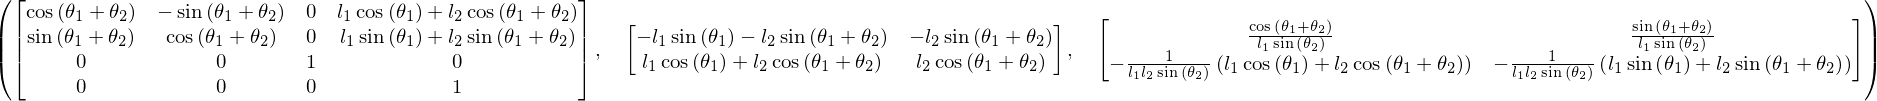

In [18]:
# Задача 3.21 од Збирка решени задачи по вовед во роботика
# а)
# use sympy sp.pi here instead of np.pi
l_1, l_2 = sp.symbols('l_1, l_2')
substitutions = {l_1: 2, l_2: 2}  # for robot.plot()
robot = asirt.SerialLink(subs=substitutions)
robot.add_revolute_joint(0, 0, l_1, 0)
robot.add_revolute_joint(0, 0, l_2, 0)
robot.plot()
t = robot.forward_kinematics()
j = robot.linear_jacobian()[:2, :]
j_inv = j.inverse_ADJ().simplify()
t, j, j_inv

In [19]:
# Задача 3.21 од Збирка решени задачи по вовед во роботика
# б)
theta_1, theta_2 = sp.symbols('theta_1, theta_2')
det_j = j.det().simplify()
equation = sp.Eq(det_j, 0).simplify()
solution = sp.solveset(det_j, theta_2)
equation, solution

In [20]:
# Задача 3.21 од Збирка решени задачи по вовед во роботика
# в)
l = sp.sqrt(l_1**2 + l_2**2 + 2*l_1*l_2*sp.cos(theta_2))
theta = theta_1 + theta_2
j_new = asirt.jacobian([l, theta], [theta_1, theta_2]).simplify()
j_new_inv = j_new.inverse_ADJ().simplify()
j_new, j_new_inv

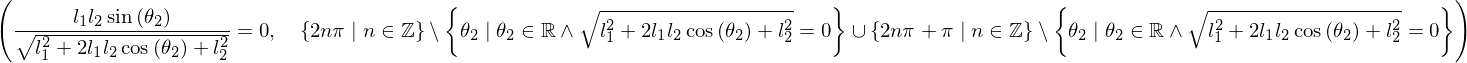

In [21]:
# Задача 3.21 од Збирка решени задачи по вовед во роботика
det_j_new = j_new.det().simplify()
equation = sp.Eq(det_j_new, 0).simplify()
solution = sp.solveset(det_j_new, theta_2)
equation, solution